In [19]:
import torch
from PIL import Image
from torchvision.utils import save_image

from generator import Generator
import config


device = torch.device("cuda")


transform = config.TRANSFORM
num_res_blocks = config.NUM_RES_BLOCKS
checkpoint_file = config.CHECKPOINT_GEN_H

model = Generator(num_res_blocks=num_res_blocks).to(device)
checkpoint = torch.load(checkpoint_file, map_location=device)

model.load_state_dict(checkpoint["state_dict"])

<All keys matched successfully>

In [20]:
def inference(image):
    transformed_image = transform(image)

    batched_image = transformed_image.unsqueeze(0).to(device)

    preds = model(batched_image)

    return preds



In [36]:
from torchvision.transforms.functional import to_pil_image

image = Image.open("../dataset/before/human/train_101.jpg").convert("RGB")

result = inference(image)*0.5+0.5

result = to_pil_image(result[0])

Text(0.5, 1.0, 'result')

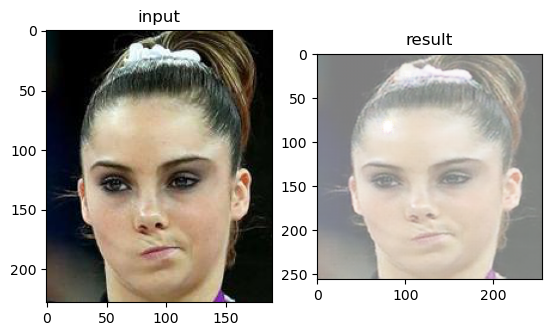

In [37]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('input')
plt.subplot(1,2,2)
plt.imshow(result, cmap='gray')
plt.title('result')